In [1]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

In [2]:
DATASET_PATH = '/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation'

In [3]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [4]:
class_names

['clear', 'amber', 'milky']

In [5]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [6]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [7]:
df.head()

,name,label
0,/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/clear/week9_3x_regular_IMG_2183_IMG_2183_p11_bbox_17.png,0
1,/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/clear/week9_3x_regular_IMG_2183_IMG_2183_p11_bbox_2.png,0
2,/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/clear/week9_3x_regular_IMG_2183_IMG_2183_p14_bbox_20.png,0
3,/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/clear/week9_3x_regular_IMG_2183_IMG_2183_p13_bbox_8.png,0
4,/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/clear/week9_3x_regular_IMG_2183_IMG_2183_p14_bbox_11.png,0


In [8]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

In [9]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

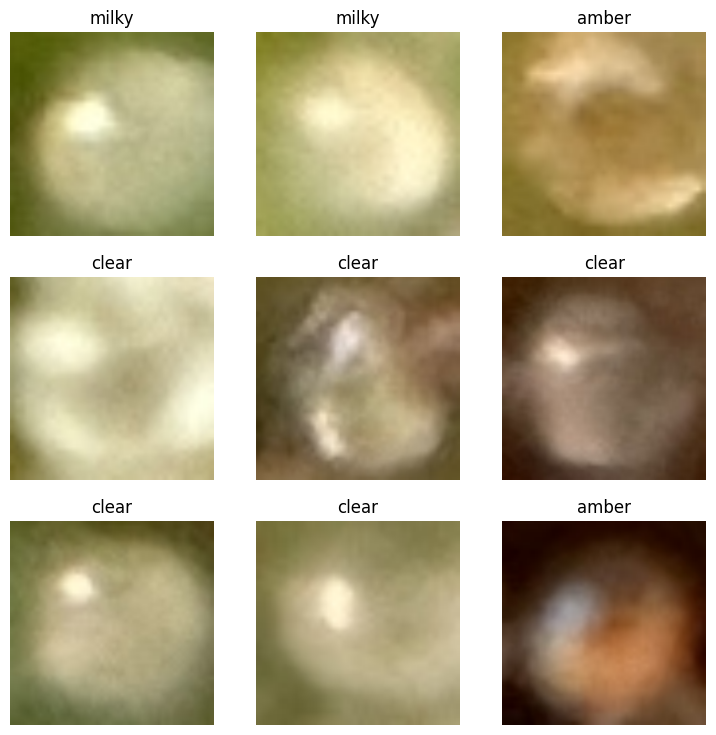

In [10]:
dls.show_batch()

## Create a model

In [11]:
model = vision_learner(
    dls=dls,
    arch=models.alexnet,
    metrics=[accuracy, error_rate]
)

/home/etaylor/.conda/envs/test_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/etaylor/.conda/envs/test_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/etaylor/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 46.2MB/s] 


In [12]:
model.fine_tune(
    epochs=15
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.533971,0.712366,0.736842,0.263158,00:12


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.951093,0.604505,0.821053,0.178947,00:02
1,0.827167,0.633911,0.800000,0.200000,00:01
2,0.794031,0.746930,0.768421,0.231579,00:01
3,0.660674,0.519327,0.778947,0.221053,00:01
4,0.567390,0.542871,0.810526,0.189474,00:01
5,0.488321,0.670269,0.789474,0.210526,00:01
6,0.452978,0.650538,0.821053,0.178947,00:01
7,0.396807,0.664678,0.810526,0.189474,00:01
8,0.335852,0.670516,0.800000,0.200000,00:01
9,0.284227,0.594337,0.831579,0.168421,00:01


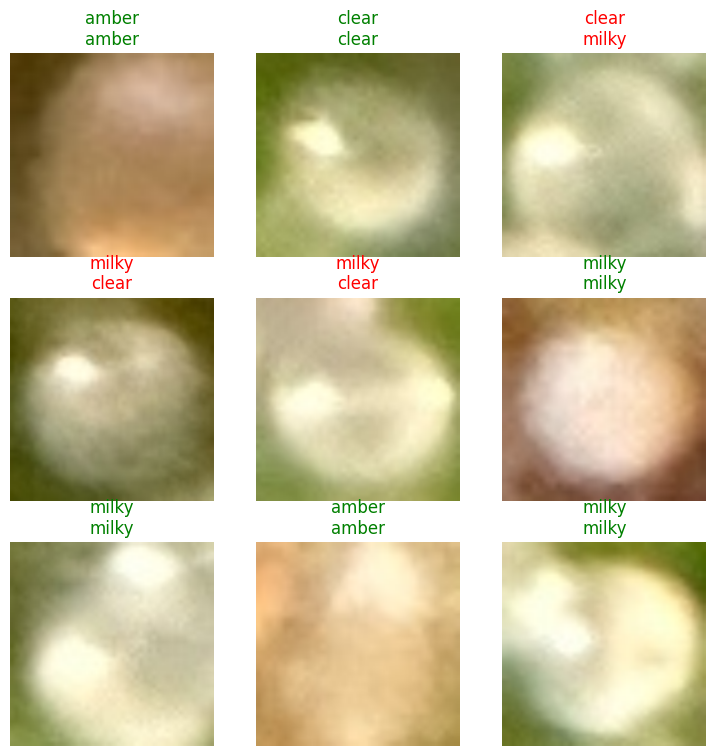

In [13]:
model.show_results()

## Save the model

In [25]:
model_saving_path = '/home/etaylor/pycharmProjects/thesis/image_classification'
model_name = 'alexnet_trichome_classifier'
model_checkpoint = f'{model_saving_path}/{model_name}.pkl'
model.export(model_checkpoint)

## Load the model

In [15]:
new_model = load_learner(f'{DATASET_PATH}/{model_checkpoint}')

## Predict from the loaded model

In [23]:
clear_image_path = '/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/clear/week9_3x_regular_IMG_2183_IMG_2183_p14_bbox_6.png'
new_model.predict(
    item=clear_image_path
)

('clear', tensor(1), tensor([1.1063e-03, 9.9889e-01, 7.7574e-08]))

In [19]:
amber_image_path = '/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/amber/week9_3x_regular_IMG_2183_IMG_2183_p8_bbox_14.png'
new_model.predict(
    item=amber_image_path
)

('amber', tensor(0), tensor([0.9936, 0.0017, 0.0047]))

In [20]:
milky_image_path = '/home/etaylor/images/images_patches/trichomes_patches/trichomes_bbox_images/trichomes_bbox_annotation/milky/week9_3x_regular_IMG_2183_IMG_2183_p17_bbox_1.png'
new_model.predict(
    item=milky_image_path
)

('milky', tensor(2), tensor([2.3091e-02, 3.5653e-05, 9.7687e-01]))